In [105]:
import numpy as np
import pandas as pd
import os
from pprint import pprint
import sklearn.pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import expon, uniform
from scipy.sparse import spmatrix
import string
import matplotlib.pyplot as plt


In [106]:

def get_all_data_from_dir(dirname: str) -> tuple[list[str], list[str], list[str]]:
    x_train = load_data_from_file(os.path.join(dirname, "x_train.csv"), "text")
    y_train = load_data_from_file(os.path.join(dirname, "y_train.csv"), "is_positive_sentiment")
    x_test = load_data_from_file(os.path.join(dirname, "x_test.csv"), "text")
    return remove_punctuation(x_train), y_train, remove_punctuation(x_test)

def remove_punctuation(strings: list[str]) -> list[str]:
    s1 = [s.translate(str.maketrans('', '', string.punctuation)) for s in strings]
    s2 = [s.lower() for s in s1]
    return s2

def load_data_from_file(filename: str, col: str) -> list[str]:
    csv_data = pd.read_csv(filename)
    # pprint(csv_data)
    list_of_sentences = csv_data[col].values.tolist()
    return list_of_sentences


In [160]:
x, y, x_test = get_all_data_from_dir("data_reviews")
x = np.array(x)
y = np.array(y, dtype=np.int32)
x_test = np.array(x_test)

pipeline = sklearn.pipeline.Pipeline([
    ("bow_feature_extractor", CountVectorizer(ngram_range=(1,1), stop_words="english", strip_accents="ascii")),
    ("classifier", LogisticRegression(max_iter=20000)),
])

distributions = {
    "classifier__C": np.logspace(-7, 7, 50), 
    # "bow_feature_extractor__min_df": np.linspace(0, 10, 5), 
    "bow_feature_extractor__max_df": np.linspace(0.01, 0.5, 50)
}

clf = GridSearchCV(pipeline, distributions, return_train_score=True, verbose=2, n_jobs=-1, cv=5, scoring=lambda e, x, y: roc_auc_score(y, e.predict(x)))

clf.fit(x, y)

yhat_test = clf.predict_proba(x_test)[:,1]
# with open("yproba1_test.txt", "w") as f:
#     f.writelines([f"{str(v)}\n" for v in yhat_test])


Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.9306977288832497e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.9306977288832497e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.9306977288832497e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.9306977288832497e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.9306977288832497e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-07; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=3.7275

In [161]:
pd.DataFrame(clf.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bow_feature_extractor__max_df,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022919,0.003792,0.003542,0.000902,0.01,0.0,"{'bow_feature_extractor__max_df': 0.01, 'class...",0.695833,0.687500,0.716667,...,0.705000,0.013084,2187,0.885417,0.883333,0.864062,0.870833,0.868750,0.874479,0.008398
1,0.020654,0.002807,0.003653,0.001394,0.01,0.0,"{'bow_feature_extractor__max_df': 0.01, 'class...",0.693750,0.687500,0.716667,...,0.704583,0.013398,2190,0.885417,0.882292,0.863021,0.870312,0.868750,0.873958,0.008495
2,0.018357,0.002115,0.004317,0.001887,0.01,0.0,"{'bow_feature_extractor__max_df': 0.01, 'class...",0.704167,0.687500,0.714583,...,0.705833,0.012176,2182,0.885937,0.883333,0.862500,0.869271,0.868229,0.873854,0.009137
3,0.017771,0.001851,0.004180,0.001449,0.01,0.000001,"{'bow_feature_extractor__max_df': 0.01, 'class...",0.693750,0.687500,0.720833,...,0.705000,0.013731,2189,0.885938,0.883854,0.881250,0.868750,0.868750,0.877708,0.007464
4,0.017090,0.000655,0.002913,0.000171,0.01,0.000001,"{'bow_feature_extractor__max_df': 0.01, 'class...",0.695833,0.722917,0.720833,...,0.712917,0.011592,2051,0.886979,0.897917,0.881250,0.869271,0.868750,0.880833,0.011041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.123118,0.161292,0.003185,0.000177,0.5,719685.673001,"{'bow_feature_extractor__max_df': 0.5, 'classi...",0.712500,0.754167,0.712500,...,0.729167,0.015646,1807,0.993750,0.995833,0.995833,0.996875,0.995833,0.995625,0.001021
2496,1.224935,0.272530,0.003506,0.000780,0.5,1389495.494373,"{'bow_feature_extractor__max_df': 0.5, 'classi...",0.716667,0.756250,0.718750,...,0.732083,0.014228,1699,0.993750,0.995833,0.995833,0.996875,0.995312,0.995521,0.001021
2497,1.078028,0.223874,0.002975,0.000222,0.5,2682695.79528,"{'bow_feature_extractor__max_df': 0.5, 'classi...",0.718750,0.758333,0.722917,...,0.730417,0.014228,1757,0.993750,0.995833,0.995833,0.996875,0.995312,0.995521,0.001021
2498,1.251151,0.241306,0.003314,0.000321,0.5,5179474.679231,"{'bow_feature_extractor__max_df': 0.5, 'classi...",0.725000,0.760417,0.725000,...,0.733333,0.014006,1558,0.993750,0.995833,0.995833,0.996875,0.995833,0.995625,0.001021


In [286]:
clf.cv_results_["mean_train_score"][clf.best_index_]


0.9585416666666667

In [111]:
type(clf.cv_results_["param_classifier__C"])


numpy.ma.core.MaskedArray

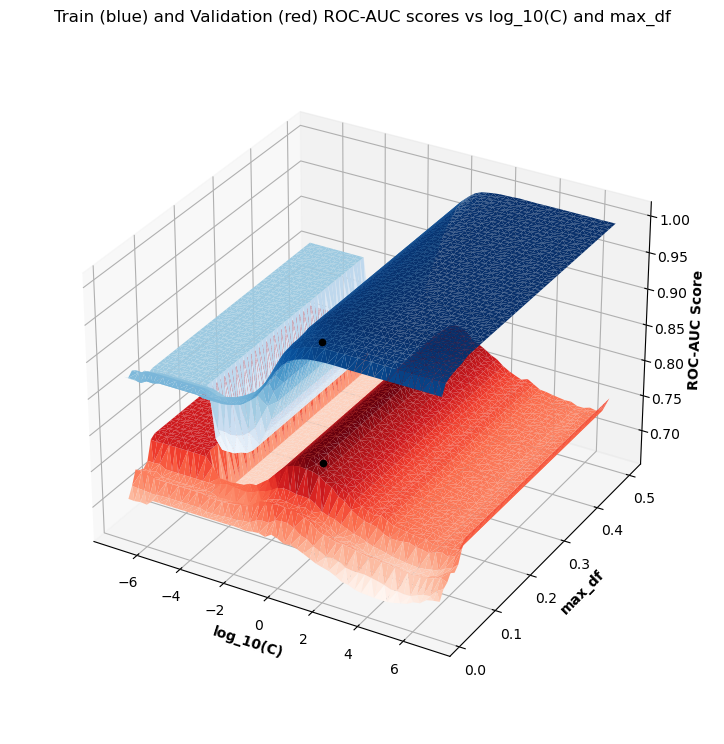

In [339]:
# https://matplotlib.org/stable/gallery/mplot3d/wire3d.html#sphx-glr-gallery-mplot3d-wire3d-py

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(121, projection='3d', computed_zorder=False) 

# X is C values
# Y is max_df values
# Z is scores: either mean_test_score or mean_train_score
x_axis = np.log10(np.asarray(clf.cv_results_["param_classifier__C"], dtype=np.float64))
y_axis = np.asarray(clf.cv_results_["param_bow_feature_extractor__max_df"], dtype=np.float64)

width = depth = 1
bottom = np.zeros_like(clf.cv_results_["mean_test_score"])

indices = np.indices(y_axis.shape)
trunc_indis = indices[y_axis[indices] < 0.2]

# y_axis = y_axis[trunc_indis]
# x_axis = x_axis[trunc_indis]

# grida, gridb = np.meshgrid(x_axis, y_axis)

# print(grida)
# print(gridb)

# Grab some test data.
# X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
# ax.plot_wireframe([X], [Y, Z, rstride=10, cstride=10)

z_axis_1 = np.asarray(clf.cv_results_["mean_test_score"], dtype=np.float64)
z_axis_2 = np.asarray(clf.cv_results_["mean_train_score"], dtype=np.float64)

# z_axis_1 = z_axis_1[trunc_indis]
# z_axis_2 = z_axis_2[trunc_indis]

# print(x_axis.dtype)
# print(y_axis.dtype)
# print(z_axis_1.dtype)

ax.plot_trisurf(x_axis, y_axis, z_axis_1, cmap=plt.cm.Reds, label="Red", color="red", zorder=0)
ax.plot_trisurf(x_axis, y_axis, z_axis_2, cmap=plt.cm.Blues, label="Blue", color="blue", zorder=10)
ax.set_title("Train (blue) and Validation (red) ROC-AUC scores vs log_10(C) and max_df")

best_train_score = clf.cv_results_["mean_train_score"][clf.best_index_]
best_test_score = clf.cv_results_["mean_test_score"][clf.best_index_]
best_C = clf.cv_results_["param_classifier__C"][clf.best_index_]
best_max_df = clf.cv_results_["param_bow_feature_extractor__max_df"][clf.best_index_]

ax.scatter([best_C, best_C], [best_max_df, best_max_df], [best_test_score, best_train_score], color="black", alpha=1.0, depthshade=False, zorder=20)

ax.set_xlabel("log_10(C)", fontweight="bold")
ax.set_ylabel("max_df", fontweight="bold")
ax.set_zlabel("ROC-AUC Score", fontweight="bold")
ax.set_box_aspect(aspect=None, zoom=0.9)
